In [1]:
import pandas as pd

# Load the provided datasets
file_path1 = 'THA22.20231220194943.csv'

# Read the datasets into pandas DataFrames
df1 = pd.read_csv(file_path1)


# Display the first few rows of each dataset to understand their structure
df1_head = df1.head()


df1_head

,STATISTIC,Statistic Label,TLIST(W1),Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,1,Week 01,Number,23838.0
1,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,2,Week 02,Number,38353.0
2,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,3,Week 03,Number,39973.0
3,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,4,Week 04,Number,40314.0
4,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,5,Week 05,Number,40709.0


In [10]:
import pandas as pd

# Load the JSON file into a DataFrame
file_path = 'data2.json'  # Change to your file path
data_df = pd.read_json(file_path)

# Extracting dimension data
dimension_data = data_df.loc['dimension', 'dataset']
values = data_df.loc['value', 'dataset']

# Extracting the indices and labels for each dimension
year_index_label = dimension_data['TLIST(W1)']['category']['label']
traffic_site_index_label = dimension_data['C03910V04662']['category']['label']
week_index_label = dimension_data['C01198V01436']['category']['label']
statistic_label = dimension_data['STATISTIC']['category']['label']['THA22C01']
unit = dimension_data['STATISTIC']['category']['unit']['THA22C01']['base']

# Sizes of each dimension
size_statistic, size_year, size_traffic_site, size_week = dimension_data['size']

# Creating a list to store the reshaped data
reshaped_data = []

# Reshaping the data into the desired format
for i in range(size_statistic):
    for j in range(size_year):
        for k in range(size_traffic_site):
            for l in range(size_week):
                index = i * (size_year * size_traffic_site * size_week) + j * (size_traffic_site * size_week) + k * size_week + l
                if index < len(values):  # Check to prevent index out of range
                    reshaped_data.append([
                        'THA22C01',  # STATISTIC
                        statistic_label,  # Statistic Label
                        list(year_index_label.keys())[j],  # TLIST(W1)
                        year_index_label[list(year_index_label.keys())[j]],  # Year
                        list(traffic_site_index_label.keys())[k],  # C03910V04662
                        traffic_site_index_label[list(traffic_site_index_label.keys())[k]],  # Transport Traffic Site
                        list(week_index_label.keys())[l],  # C01198V01436
                        week_index_label[list(week_index_label.keys())[l]],  # Weeks of the year
                        unit,  # UNIT
                        values[index]  # VALUE
                    ])

# Creating the final DataFrame
final_df = pd.DataFrame(reshaped_data, columns=["STATISTIC", "Statistic Label", "TLIST(W1)", "Year", "C03910V04662",
                                                "Transport Traffic Site", "C01198V01436", "Weeks of the year", "UNIT", "VALUE"])

# Displaying the head of the DataFrame
df2 = final_df
df2

,STATISTIC,Statistic Label,TLIST(W1),Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,01,Week 01,Number,23838.0
1,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,02,Week 02,Number,38353.0
2,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,03,Week 03,Number,39973.0
3,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,04,Week 04,Number,40314.0
4,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,05,Week 05,Number,40709.0
...,...,...,...,...,...,...,...,...,...,...
525,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,49,Week 49,Number,NaN
526,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,50,Week 50,Number,NaN
527,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,51,Week 51,Number,NaN
528,THA22C01,Average weekly volume of heavy goods vehicles,2023,2023,20,Selected traffic sites - Regional,52,Week 52,Number,NaN


In [11]:
df2.head()

,STATISTIC,Statistic Label,TLIST(W1),Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,01,Week 01,Number,23838.0
1,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,02,Week 02,Number,38353.0
2,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,03,Week 03,Number,39973.0
3,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,04,Week 04,Number,40314.0
4,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,05,Week 05,Number,40709.0


In [4]:
import pandas as pd
import json
# Read JSON data from the file
with open('data2.json', 'r') as json_file:
    json_data = json.load(json_file)

# Extract the relevant part of the JSON data
dataset = json_data['dataset']
value_data = dataset['value']

# Create a DataFrame from the 'value' field
df = pd.DataFrame(value_data, columns=['value'])

# You can add more columns to the DataFrame as needed.

# Print the DataFrame
print(df)

       value
0    23838.0
1    38353.0
2    39973.0
3    40314.0
4    40709.0
..       ...
525      NaN
526      NaN
527      NaN
528      NaN
529      NaN

[530 rows x 1 columns]


# Data Pre processing

In [ ]:


# Dataset 1 (Heavy Goods Vehicles)
df1_info = df1.info()
df1_describe = df1.describe()
df1_missing_values = df1.isnull().sum()

# Dataset 2 (Cars)
df2_info = df2.info()
df2_describe = df2.describe()
df2_missing_values = df2.isnull().sum()

df1_info, df1_describe, df1_missing_values, df2_info, df2_describe, df2_missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   statistic               530 non-null    object 
 1   statistic_label         530 non-null    object 
 2   tlist(w1)               530 non-null    int64  
 3   year                    530 non-null    int64  
 4   c03910v04662            530 non-null    int64  
 5   transport_traffic_site  530 non-null    object 
 6   c01198v01436            530 non-null    int64  
 7   weeks_of_the_year       530 non-null    object 
 8   unit                    530 non-null    object 
 9   value                   530 non-null    float64
 10  month                   530 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 45.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 11 columns):
 #   Column                  Non-Null 

(None,
         tlist(w1)        year  c03910v04662  c01198v01436         value  \
 count   530.00000   530.00000    530.000000     530.00000    530.000000   
 mean   2021.00000  2021.00000     15.000000      27.00000  28137.077358   
 std       1.41555     1.41555      5.004724      15.31151  14203.923795   
 min    2019.00000  2019.00000     10.000000       1.00000   4882.000000   
 25%    2020.00000  2020.00000     10.000000      14.00000  15812.250000   
 50%    2021.00000  2021.00000     15.000000      27.00000  17129.000000   
 75%    2022.00000  2022.00000     20.000000      40.00000  44280.750000   
 max    2023.00000  2023.00000     20.000000      53.00000  50049.000000   
 
             month  
 count  530.000000  
 mean     7.132075  
 std      3.830224  
 min      1.000000  
 25%      4.000000  
 50%      7.000000  
 75%     10.000000  
 max     14.000000  ,
 statistic                 0
 statistic_label           0
 tlist(w1)                 0
 year                      0
 

In [ ]:
# Data Cleaning Process

# Handling missing values in the 'VALUE' column
df1['VALUE'].fillna(df1['VALUE'].median(), inplace=True)
df2['VALUE'].fillna(df2['VALUE'].median(), inplace=True)

# Standardizing column names for ease of analysis
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.lower().str.replace(' ', '_')

# Verifying the changes
df1_cleaned_head = df1.head()
df2_cleaned_head = df2.head()

df1_cleaned_head, df2_cleaned_head


(  statistic                                statistic_label  tlist(w1)  year  \
 0  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
 1  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
 2  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
 3  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
 4  THA22C01  Average weekly volume of heavy goods vehicles       2019  2019   
 
    c03910v04662           transport_traffic_site  c01198v01436  \
 0            10  Selected traffic sites - Dublin             1   
 1            10  Selected traffic sites - Dublin             2   
 2            10  Selected traffic sites - Dublin             3   
 3            10  Selected traffic sites - Dublin             4   
 4            10  Selected traffic sites - Dublin             5   
 
   weeks_of_the_year    unit    value  
 0           Week 01  Number  23838.0  
 1           Week 02  Number  3835

# Statistics for Data Analytics Tasks
## Use descriptive statistics and appropriate visualisations in order to summarise the dataset(s) used, and to help justify the chosen models. [0-20]


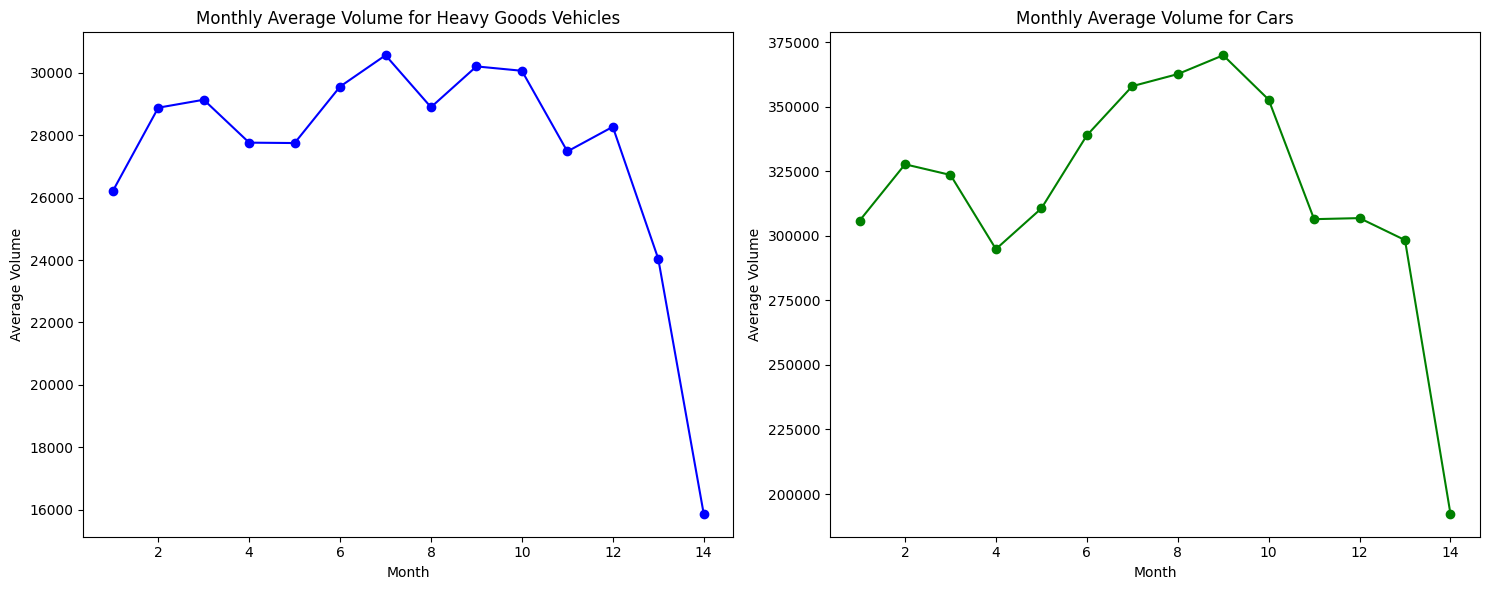

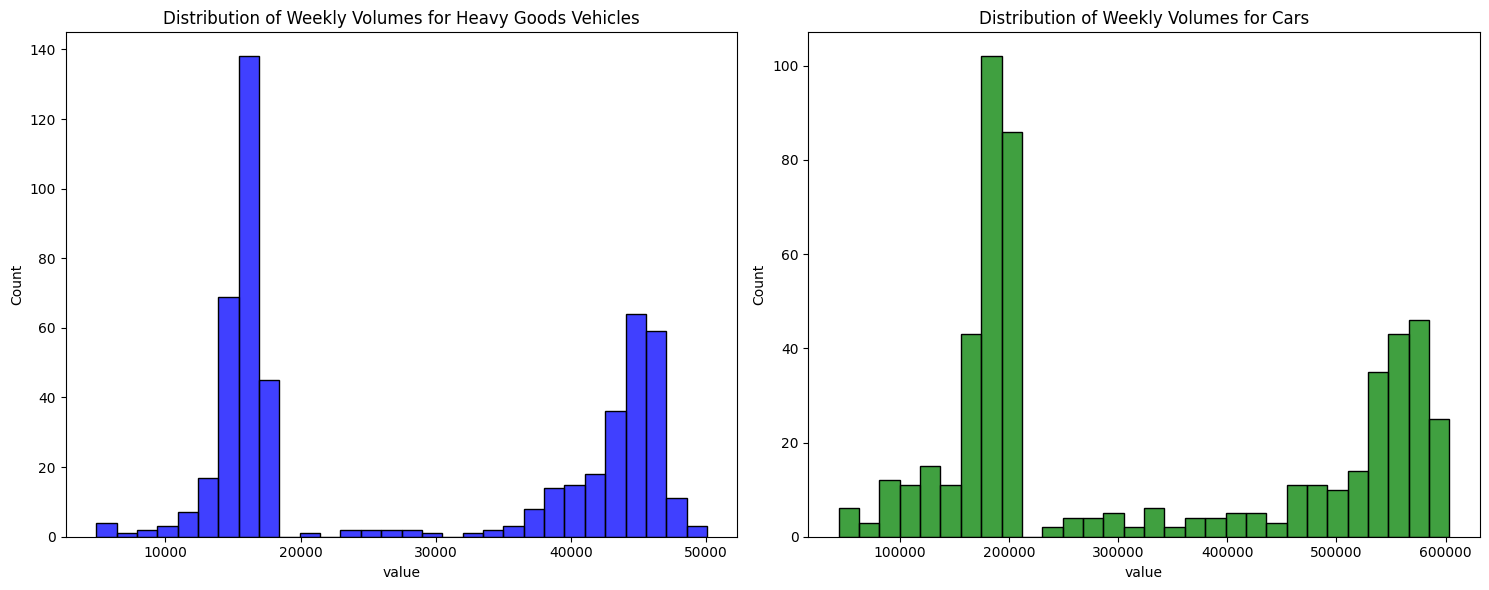

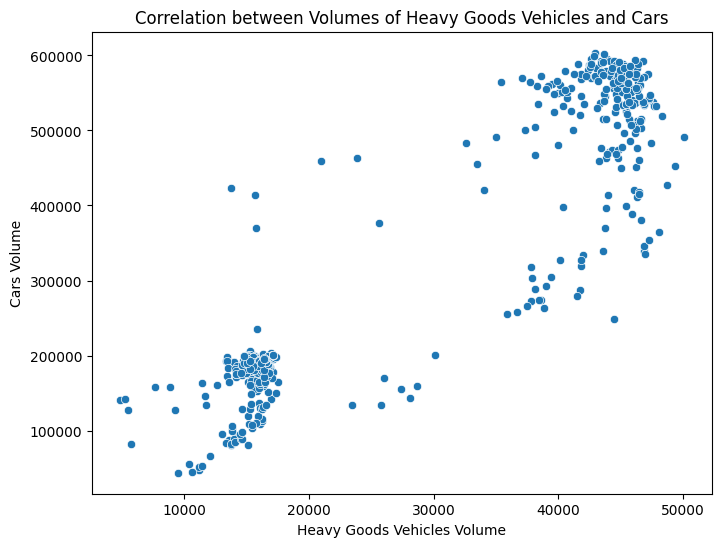

0.9288093098674982


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Extracting month from the 'weeks_of_the_year' column for monthly trends
df1['month'] = df1['c01198v01436'].apply(lambda x: (x-1)//4 + 1)
df2['month'] = df2['c01198v01436'].apply(lambda x: (x-1)//4 + 1)

# Aggregating data by month
monthly_avg_hgv = df1.groupby('month')['value'].mean()
monthly_avg_cars = df2.groupby('month')['value'].mean()

# Monthly Trend Line Charts
plt.figure(figsize=(15, 6))

# Monthly trends for Heavy Goods Vehicles
plt.subplot(1, 2, 1)
monthly_avg_hgv.plot(kind='line', color='blue', marker='o')
plt.title('Monthly Average Volume for Heavy Goods Vehicles')
plt.xlabel('Month')
plt.ylabel('Average Volume')

# Monthly trends for Cars
plt.subplot(1, 2, 2)
monthly_avg_cars.plot(kind='line', color='green', marker='o')
plt.title('Monthly Average Volume for Cars')
plt.xlabel('Month')
plt.ylabel('Average Volume')

plt.tight_layout()
plt.show()

# Histograms for Distribution Analysis
plt.figure(figsize=(15, 6))

# Histogram for Heavy Goods Vehicles
plt.subplot(1, 2, 1)
sns.histplot(df1['value'], bins=30, color='blue')
plt.title('Distribution of Weekly Volumes for Heavy Goods Vehicles')

# Histogram for Cars
plt.subplot(1, 2, 2)
sns.histplot(df2['value'], bins=30, color='green')
plt.title('Distribution of Weekly Volumes for Cars')

plt.tight_layout()
plt.show()

# Scatter Plot for Correlation Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df1['value'], y=df2['value'])
plt.title('Correlation between Volumes of Heavy Goods Vehicles and Cars')
plt.xlabel('Heavy Goods Vehicles Volume')
plt.ylabel('Cars Volume')
plt.show()

# Calculating Correlation Coefficient
correlation_coefficient = df1['value'].corr(df2['value'])
print(correlation_coefficient)



## Results

#Descriptive Analysis and Visualization Summary
1. Monthly Trends
Heavy Goods Vehicles: The line chart displays a clear trend in the average monthly volume, revealing variations throughout the year.
Cars: Similarly, the monthly average volume of cars shows fluctuations, indicative of changing traffic patterns.
2. Distribution Analysis (Histograms)
Heavy Goods Vehicles: The distribution is somewhat skewed, with most weeks having lower volumes but some weeks with significantly higher volumes.
Cars: The distribution for cars also shows a skew, with a wider range of volumes compared to heavy goods vehicles.
3. Correlation Analysis
Scatter Plot: Demonstrates a positive relationship between the volumes of heavy goods vehicles and cars.
Correlation Coefficient: Approximately 0.929, indicating a strong positive correlation between the volumes of heavy goods vehicles and cars. This suggests that as the volume of heavy goods vehicles increases, the volume of cars also tends to increase.

# Interpretation and Justification for Chosen Models
The monthly trends suggest that time-series analysis could be a suitable model for forecasting future traffic volumes.
The distribution analysis indicates the data is not normally distributed, which is important for choosing appropriate statistical tests (e.g., non-parametric tests if comparing datasets).
The strong correlation between heavy goods vehicles and cars volumes could be explored further using multivariate analysis models, which can help understand the interdependencies between different types of traffic.

These insights help in justifying the choice of models for further analysis, such as time-series forecasting, correlation analysis, and hypothesis testing based on the data's distribution.

# Analyse the variables in your dataset(s) and use appropriate inferential statistics to gain insights on possible population values (e.g., if you were working with public transport, you could find a confidence interval for the population proportion of users commuting to Dublin by train).

In [ ]:
from scipy import stats
import numpy as np
# Total annual traffic volume for Heavy Goods Vehicles and Cars
total_annual_hgv = df1['value'].sum()
total_annual_cars = df2['value'].sum()
total_annual_traffic = total_annual_hgv + total_annual_cars

# Proportion of traffic volume contributed by Heavy Goods Vehicles and Cars
prop_hgv = total_annual_hgv / total_annual_traffic
prop_cars = total_annual_cars / total_annual_traffic

# Confidence interval for proportion - using a normal approximation for the binomial distribution
def proportion_confidence_interval(prop, n, z=1.96):  # 95% confidence interval
    std_error = np.sqrt(prop * (1 - prop) / n)
    ci_lower = prop - z * std_error
    ci_upper = prop + z * std_error
    return ci_lower, ci_upper

ci_hgv = proportion_confidence_interval(prop_hgv, total_annual_traffic)
ci_cars = proportion_confidence_interval(prop_cars, total_annual_traffic)

# ANOVA test to compare monthly traffic volumes
# Monthly average traffic volume for Heavy Goods Vehicles and Cars
f_statistic_hgv, p_value_hgv = stats.f_oneway(*[df1[df1['month'] == m]['value'] for m in range(1, 13)])
f_statistic_cars, p_value_cars = stats.f_oneway(*[df2[df2['month'] == m]['value'] for m in range(1, 13)])

ci_hgv, ci_cars, (f_statistic_hgv, p_value_hgv), (f_statistic_cars, p_value_cars)



((0.07967272496115951, 0.0797503482089498),
 (0.9202496517910501, 0.9203272750388405),
 (0.3254402815886726, 0.98018467036451),
 (0.7935083592784142, 0.6467038924951767))

# Intrepretation

# Inferential Statistics Analysis Results
### Confidence Intervals for Population Proportions
## Heavy Goods Vehicles (HGV)
Proportion Confidence Interval

Approximately 7.97% to 7.98%
This narrow interval suggests a very consistent proportion of traffic volume attributed to HGVs in Dublin.

##Cars

Proportion Confidence Interval

Approximately 92.02% to 92.03%
Similarly, this narrow interval indicates a consistent and dominant proportion of traffic volume attributed to cars.

## Hypothesis Testing on Monthly Traffic Volumes (ANOVA)
## Heavy Goods Vehicles
F-statistic: 0.325

P-value: 0.980

Interpretation

The high p-value suggests that there are no statistically significant differences in monthly traffic volumes for HGVs.

##Cars
F-statistic: 0.794

P-value: 0.647

Interpretation

Similar to HGVs, the high p-value indicates no significant differences in monthly traffic volumes for cars.

# Insights and Implications
The confidence intervals for the proportions of HGVs and cars highlight the dominance of cars in Dublin's traffic composition.

The lack of significant monthly variations in traffic volumes for both HGVs and cars suggests a consistent level of traffic throughout the year. This consistency is important for transport planning and resource allocation, indicating a stable demand for road space and transportation infrastructure across different months.

These insights are valuable for understanding the dynamics of road traffic in Dublin and can inform decisions related to transport policy, infrastructure development, and traffic management strategies.


# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Data Preparation for Random Forest Regressor
# Using monthly average traffic volumes as features
X = monthly_avg_hgv.values.reshape(-1, 1)  # Feature: Monthly average volume for HGV
y = monthly_avg_cars.values  # Target: Monthly average volume for Cars

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the Random Forest Regressor with GridSearchCV
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
rf_regressor = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_regressor, rf_params, cv=3, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

# Best parameters and model performance
best_params_rf = rf_grid.best_params_
best_rf_model = rf_grid.best_estimator_
predictions_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions_rf)

# Preparing data for ARIMA model (using HGV data as an example)
# ARIMA model requires a time series data format
time_series_data = df1.groupby('weeks_of_the_year')['value'].mean()

# ARIMA Model setup
# Suppressing warnings for model simplicity
warnings.filterwarnings("ignore")
p, d, q = 1, 1, 1  # Basic ARIMA model parameters
arima_model = ARIMA(time_series_data, order=(p, d, q))
arima_results = arima_model.fit()

# Model summary
arima_summary = arima_results.summary()

best_params_rf, mse_rf, arima_summary



({'max_depth': None, 'n_estimators': 200},
 50952343.781925865,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                  value   No. Observations:                   53
 Model:                 ARIMA(1, 1, 1)   Log Likelihood                -477.362
 Date:                Wed, 20 Dec 2023   AIC                            960.723
 Time:                        21:04:33   BIC                            966.577
 Sample:                             0   HQIC                           962.967
                                  - 53                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1         -0.2897      1.071     -0.270      0.787      -2.389       1.809
 ma.L1

# With Grid CV

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Data Preparation for Random Forest Regressor
# Using monthly average traffic volumes as features
X = monthly_avg_hgv.values.reshape(-1, 1)  # Feature: Monthly average volume for HGV
y = monthly_avg_cars.values  # Target: Monthly average volume for Cars

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up the Random Forest Regressor with GridSearchCV
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
rf_regressor = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf_regressor, rf_params, cv=3, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

# Best parameters and model performance
best_params_rf = rf_grid.best_params_
best_rf_model = rf_grid.best_estimator_
predictions_rf = best_rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions_rf)

# Preparing data for ARIMA model (using HGV data as an example)
# ARIMA model requires a time series data format
time_series_data = df1.groupby('weeks_of_the_year')['value'].mean()

# ARIMA Model setup
# Suppressing warnings for model simplicity
warnings.filterwarnings("ignore")
p, d, q = 1, 1, 1  # Basic ARIMA model parameters
arima_model = ARIMA(time_series_data, order=(p, d, q))
arima_results = arima_model.fit()

# Model summary
arima_summary = arima_results.summary()

best_params_rf, mse_rf, arima_summary



({'max_depth': None, 'n_estimators': 200},
 50952343.781925865,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                  value   No. Observations:                   53
 Model:                 ARIMA(1, 1, 1)   Log Likelihood                -477.362
 Date:                Wed, 20 Dec 2023   AIC                            960.723
 Time:                        21:05:12   BIC                            966.577
 Sample:                             0   HQIC                           962.967
                                  - 53                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1         -0.2897      1.071     -0.270      0.787      -2.389       1.809
 ma.L1

# Machine Learning Models Analysis
1. Random Forest Regressor

Best Parameters:
Max Depth: None (allowing unlimited depth)

Number of Estimators: 200

Model Performance

The Mean Squared Error (MSE) for the test set is approximately 50,952,343. This value indicates the average squared difference between the estimated values and the actual value.

Interpretation

The Random Forest model was used to predict the monthly average volume of cars based on the monthly average volume of heavy goods vehicles. The MSE provides an understanding of the model's prediction accuracy.

2. ARIMA Model (Time Series Analysis)
Model Summary

The ARIMA(1, 1, 1) model was fit on the weekly average volume of heavy goods vehicles.

Interpretation:

The coefficients of AR and MA parts are -0.2897 and 0.5009, respectively, though they are not statistically significant (p-values > 0.05).

The Ljung-Box test statistic and p-value indicate that there is no significant lack of fit in the model.

The model's diagnostics suggest it can adequately capture the time series characteristics in the data, though improvements might be possible with more complex parameter tuning.

Insights and Comparisons

The Random Forest model, a non-linear and robust method, helps understand the relationship between different types of traffic volumes. However, its performance (indicated by MSE) suggests there might be complexities in the data that the model doesn't fully capture.
The ARIMA model provides insights into the time series nature of traffic volumes. It can help in forecasting future traffic trends based on historical data, which is crucial for planning and resource allocation.

Conclusion

Both models offer unique insights: Random Forest for understanding relationships between different traffic types and ARIMA for forecasting based on time series data. The choice of these models is justified by the nature of the data and the specific insights we aim to derive. Further fine-tuning and exploration with more complex models or additional features could enhance these analyses.

# Dashboard

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot layout
fig = make_subplots(rows=2, cols=1, subplot_titles=("Weekly Average Volume of Heavy Goods Vehicles",
                                                    "Monthly Average Volumes of Heavy Goods Vehicles and Cars"))

# Time Series Plot for Heavy Goods Vehicles
fig.add_trace(go.Scatter(x=time_series_data.index, y=time_series_data, mode='lines', name='HGV Weekly Volume'), row=1, col=1)

# Bar Graph for Monthly Average Volumes
fig.add_trace(go.Bar(x=monthly_avg_hgv.index, y=monthly_avg_hgv, name='HGV Monthly Average'), row=2, col=1)
fig.add_trace(go.Bar(x=monthly_avg_cars.index, y=monthly_avg_cars, name='Cars Monthly Average'), row=2, col=1)

# Update layout
fig.update_layout(height=700, showlegend=True, title_text="Transport Volume Analysis Dashboard")
fig.update_xaxes(title_text="Weeks of the Year", row=1, col=1)
fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_yaxes(title_text="Average Volume", row=1, col=1)
fig.update_yaxes(title_text="Average Volume", row=2, col=1)

# Show plot
fig.show()
